In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
data = pd.read_csv(r'C:\Users\rutto\OneDrive\Desktop\NetML\Network\anomaly_detection\network_anomaly_data.csv')
data.head()

,Timestamp,Source IP,Destination IP,Packet Count,Response Time (ms),Throughput (Mbps),Packet Loss (%),Is Anomaly
0,2024-11-11 20:24:29.812127,3.178.203.201,242.46.108.111,511,75.08,83.36,0.30,0
1,2024-11-11 20:24:34.812127,164.1.73.49,51.104.126.197,518,33.11,86.79,0.29,0
2,2024-11-11 20:24:39.812127,154.38.124.10,21.10.74.15,2976,380.18,23.94,7.51,1
3,2024-11-11 20:24:44.812127,16.207.39.59,11.53.139.129,480,52.28,95.95,0.85,0
4,2024-11-11 20:24:49.812127,182.103.96.118,36.80.39.89,537,50.96,95.83,0.41,0


In [3]:
data.tail()

,Timestamp,Source IP,Destination IP,Packet Count,Response Time (ms),Throughput (Mbps),Packet Loss (%),Is Anomaly
1995,2024-11-11 23:10:44.812127,24.60.8.218,244.247.237.149,468,43.37,90.95,0.70,0
1996,2024-11-11 23:10:49.812127,243.5.198.15,17.54.227.14,511,54.03,102.51,0.76,0
1997,2024-11-11 23:10:54.812127,211.137.177.177,214.78.223.106,499,41.83,118.70,0.74,0
1998,2024-11-11 23:10:59.812127,61.135.30.195,57.252.248.190,535,91.77,92.42,0.70,0
1999,2024-11-11 23:11:04.812127,137.198.176.183,171.172.247.89,471,50.20,102.90,0.50,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           2000 non-null   object 
 1   Source IP           2000 non-null   object 
 2   Destination IP      2000 non-null   object 
 3   Packet Count        2000 non-null   int64  
 4   Response Time (ms)  2000 non-null   float64
 5   Throughput (Mbps)   2000 non-null   float64
 6   Packet Loss (%)     2000 non-null   float64
 7   Is Anomaly          2000 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 125.1+ KB


In [5]:
data.describe()

,Packet Count,Response Time (ms),Throughput (Mbps),Packet Loss (%),Is Anomaly
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,625.959500,66.248590,96.283825,0.848335,0.050000
std,548.266088,72.477883,21.939994,1.539566,0.217999
min,425.000000,15.110000,11.570000,0.000000,0.000000
25%,487.000000,43.422500,88.207500,0.370000,0.000000
50%,501.000000,50.365000,98.550000,0.515000,0.000000
75%,519.000000,57.717500,109.515000,0.670000,0.000000
max,3312.000000,402.400000,165.620000,8.040000,1.000000


In [6]:
data.isnull().sum()

Timestamp             0
Source IP             0
Destination IP        0
Packet Count          0
Response Time (ms)    0
Throughput (Mbps)     0
Packet Loss (%)       0
Is Anomaly            0
dtype: int64

In [7]:
data.shape

(2000, 8)

In [8]:
data.columns

Index(['Timestamp', 'Source IP', 'Destination IP', 'Packet Count',
       'Response Time (ms)', 'Throughput (Mbps)', 'Packet Loss (%)',
       'Is Anomaly'],
      dtype='object')

In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           2000 non-null   object 
 1   Source IP           2000 non-null   object 
 2   Destination IP      2000 non-null   object 
 3   Packet Count        2000 non-null   int64  
 4   Response Time (ms)  2000 non-null   float64
 5   Throughput (Mbps)   2000 non-null   float64
 6   Packet Loss (%)     2000 non-null   float64
 7   Is Anomaly          2000 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 125.1+ KB


In [11]:
data = data.drop(['Is Anomaly'], axis=1)

In [12]:
#data segragation into numerical and categorical

cat_columns = data.columns[data.dtypes == 'object']
num_columns = data.columns[data.dtypes != 'object']
print(cat_columns)
print(num_columns)
# data[cat_columns].head()
# data[num_columns].head()


Index(['Timestamp', 'Source IP', 'Destination IP'], dtype='object')
Index(['Packet Count', 'Response Time (ms)', 'Throughput (Mbps)',
       'Packet Loss (%)'],
      dtype='object')


In [13]:
data[cat_columns]

,Timestamp,Source IP,Destination IP
0,2024-11-11 20:24:29.812127,3.178.203.201,242.46.108.111
1,2024-11-11 20:24:34.812127,164.1.73.49,51.104.126.197
2,2024-11-11 20:24:39.812127,154.38.124.10,21.10.74.15
3,2024-11-11 20:24:44.812127,16.207.39.59,11.53.139.129
4,2024-11-11 20:24:49.812127,182.103.96.118,36.80.39.89
...,...,...,...
1995,2024-11-11 23:10:44.812127,24.60.8.218,244.247.237.149
1996,2024-11-11 23:10:49.812127,243.5.198.15,17.54.227.14
1997,2024-11-11 23:10:54.812127,211.137.177.177,214.78.223.106
1998,2024-11-11 23:10:59.812127,61.135.30.195,57.252.248.190


In [14]:
data[num_columns]

,Packet Count,Response Time (ms),Throughput (Mbps),Packet Loss (%)
0,511,75.08,83.36,0.30
1,518,33.11,86.79,0.29
2,2976,380.18,23.94,7.51
3,480,52.28,95.95,0.85
4,537,50.96,95.83,0.41
...,...,...,...,...
1995,468,43.37,90.95,0.70
1996,511,54.03,102.51,0.76
1997,499,41.83,118.70,0.74
1998,535,91.77,92.42,0.70


In [15]:
data.columns

Index(['Timestamp', 'Source IP', 'Destination IP', 'Packet Count',
       'Response Time (ms)', 'Throughput (Mbps)', 'Packet Loss (%)'],
      dtype='object')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           2000 non-null   object 
 1   Source IP           2000 non-null   object 
 2   Destination IP      2000 non-null   object 
 3   Packet Count        2000 non-null   int64  
 4   Response Time (ms)  2000 non-null   float64
 5   Throughput (Mbps)   2000 non-null   float64
 6   Packet Loss (%)     2000 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 109.5+ KB


Histogram for column: Packet Count


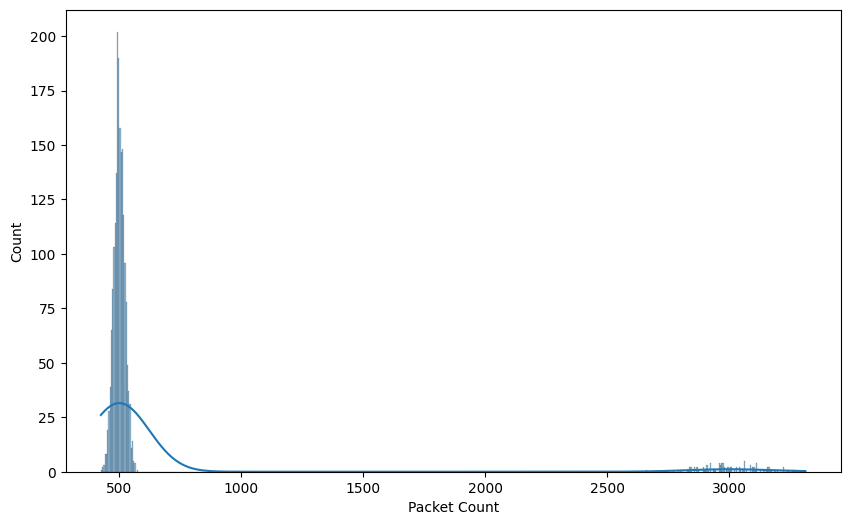

Histogram for column: Response Time (ms)


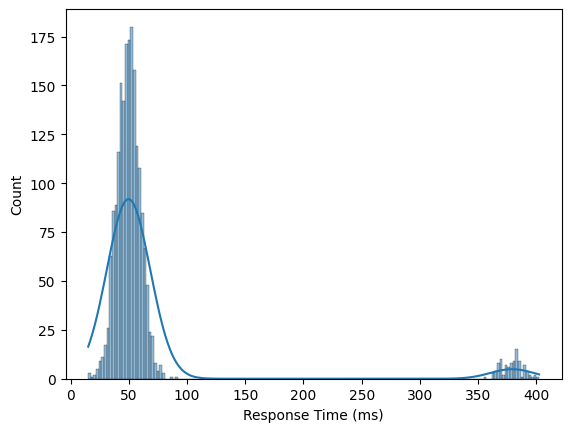

Histogram for column: Throughput (Mbps)


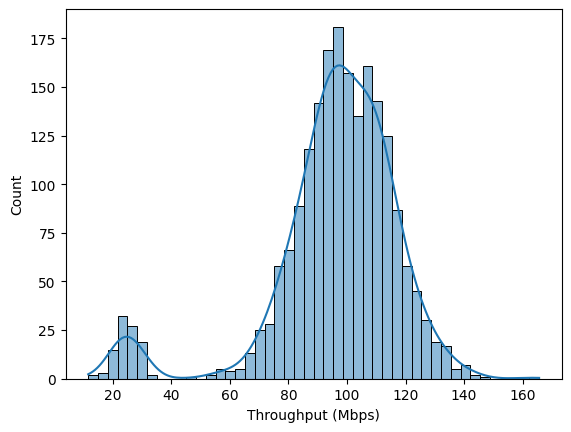

Histogram for column: Packet Loss (%)


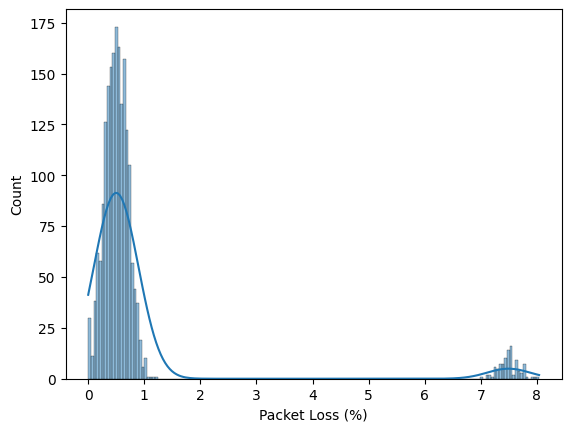

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for col in num_columns:
    sns.histplot(data=data, x=col,kde=True)
    print('Histogram for column:', col)
    plt.show()

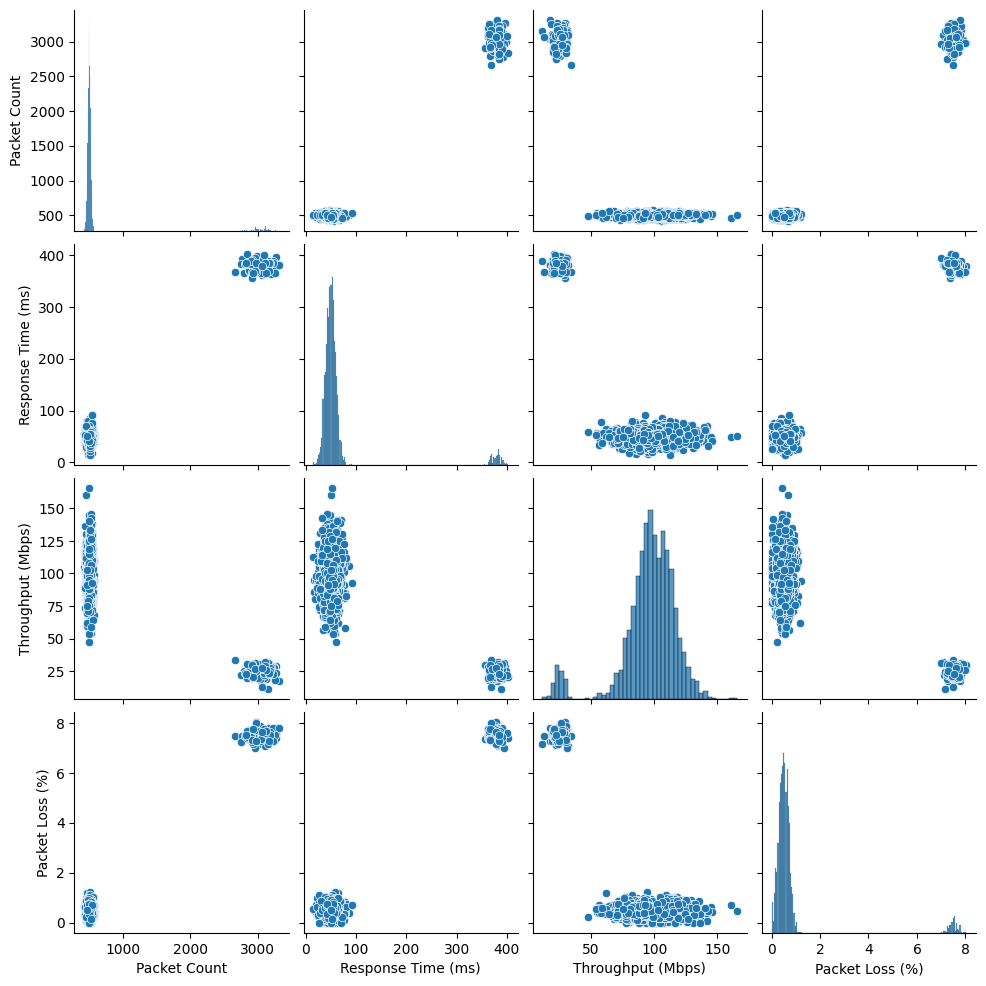

In [18]:
sns.pairplot(data)

plt.show()

In [19]:
# feature engineering steps
data['Hour'] = pd.to_datetime(data['Timestamp']).dt.hour




C:\Users\rutto\AppData\Local\Temp\ipykernel_24040\2890320189.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Hour'] = pd.to_datetime(data['Timestamp']).dt.hour


In [20]:
data.drop(columns=['Source IP', 'Destination IP', 'Timestamp'], inplace=True)

In [21]:
data

,Packet Count,Response Time (ms),Throughput (Mbps),Packet Loss (%),Hour
0,511,75.08,83.36,0.30,20
1,518,33.11,86.79,0.29,20
2,2976,380.18,23.94,7.51,20
3,480,52.28,95.95,0.85,20
4,537,50.96,95.83,0.41,20
...,...,...,...,...,...
1995,468,43.37,90.95,0.70,23
1996,511,54.03,102.51,0.76,23
1997,499,41.83,118.70,0.74,23
1998,535,91.77,92.42,0.70,23


In [22]:
features = ['Packet Count', 'Response Time (ms)', 'Throughput (Mbps)', 'Packet Loss (%)', 'Hour']

In [23]:
numeric_features = ['Packet Count', 'Response Time (ms)', 'Throughput (Mbps)', 'Packet Loss (%)', 'Hour']

In [24]:
from sklearn.impute import SimpleImputer # imputing missing values
from sklearn.preprocessing import StandardScaler # scaling
from sklearn.preprocessing import OrdinalEncoder # encoding
#pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [25]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputing missing values with mean
    ('scaler', StandardScaler())  # Scaling features
])

In [26]:
# full pipeline 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ]
)

In [27]:
# model training
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

In [28]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Applying the preprocessing pipeline
    ('model', model)  #  Isolation Forest model training
])

In [29]:
X = data[features]  # selected features for training
pipeline.fit(X)  # Fitting the full pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Packet Count',
                                                   'Response Time (ms)',
                                                   'Throughput (Mbps)',
                                                   'Packet Loss (%)',
                                                   'Hour'])])),
                ('model',
                 IsolationForest(contamination=0.05, random_state=42))])

In [30]:
# Step 6: Make predictions
predictions = pipeline.predict(X)

In [31]:
data['Prediction'] = predictions

In [32]:
print(data)

      Packet Count  Response Time (ms)  Throughput (Mbps)  Packet Loss (%)  \
0              511               75.08              83.36             0.30   
1              518               33.11              86.79             0.29   
2             2976              380.18              23.94             7.51   
3              480               52.28              95.95             0.85   
4              537               50.96              95.83             0.41   
...            ...                 ...                ...              ...   
1995           468               43.37              90.95             0.70   
1996           511               54.03             102.51             0.76   
1997           499               41.83             118.70             0.74   
1998           535               91.77              92.42             0.70   
1999           471               50.20             102.90             0.50   

      Hour  Prediction  
0       20           1  
1       20   

In [33]:
prediction_counts = data['Prediction'].value_counts()
print(prediction_counts)

Prediction
 1    1900
-1     100
Name: count, dtype: int64


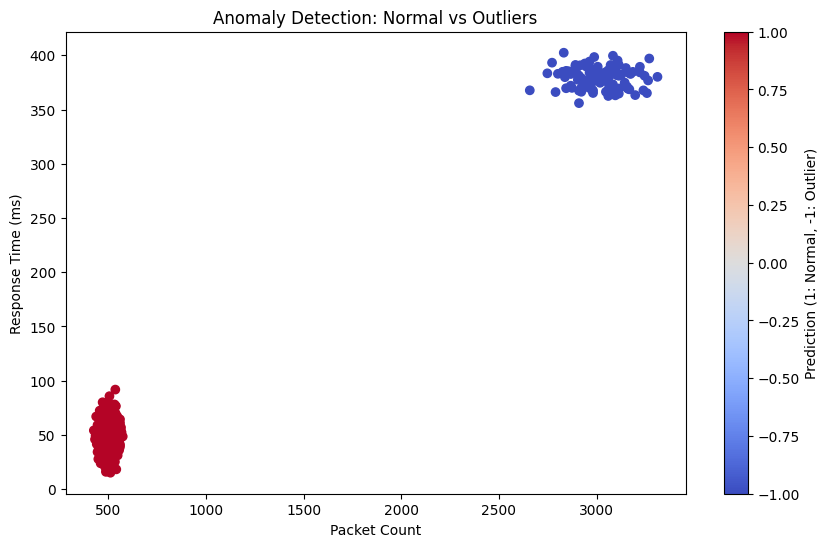

In [34]:
import matplotlib.pyplot as plt

# Plotting the Packet Count vs. Response Time with outliers and normal observations
plt.figure(figsize=(10,6))
plt.scatter(data['Packet Count'], data['Response Time (ms)'], c=data['Prediction'], cmap='coolwarm')
plt.title('Anomaly Detection: Normal vs Outliers')
plt.xlabel('Packet Count')
plt.ylabel('Response Time (ms)')
plt.colorbar(label='Prediction (1: Normal, -1: Outlier)')
plt.show()


In [35]:
import joblib
joblib.dump(pipeline, 'anomaly_detection_model.joblib')
print ('model saved')

model saved


In [36]:
loaded_pipeline = joblib.load('anomaly_detection_model.joblib')
print ('model loaded')
new_data = pd.DataFrame({
    'Packet Count': [1000],
    'Response Time (ms)': [100],
    'Throughput (Mbps)': [10],
    'Packet Loss (%)': [0.05],
    'Hour': [12]
})

predictionss = loaded_pipeline.predict(new_data)

print('Predictions:', predictionss)

model loaded
Predictions: [-1]
